In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf

In [2]:
def Vanishing_gradients(activation='sigmoid', layers=10, epochs=100):
    model = Sequential()
    model.add(Dense(10, activation=activation, input_dim=2))
    for _ in range(layers - 1):
        model.add(Dense(10, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])
    
    old_weights = model.get_weights()[0]
    
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0)
    
    new_weights = model.get_weights()[0]
    
    gradient = (old_weights - new_weights) / 0.001
    avg_grad = np.mean(np.abs(gradient))
    
    return avg_grad, history.history['loss'], model

In [3]:
sigmoid_grad, sigmoid_loss, sigmoid_model = Vanishing_gradients('sigmoid', layers=10)
relu_grad, relu_loss, relu_model = Vanishing_gradients('relu', layers=10)

plt.figure(figsize=(8,5))
plt.plot(sigmoid_loss, label='Sigmoid Activation', linewidth=2, color='orange')
plt.plot(relu_loss, label='ReLU Activation', linewidth=2, color='green')
plt.title("Training Loss Comparison (Vanishing Gradient Effect)")
plt.xlabel("Epochs")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Shuvo\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'X_train' is not defined

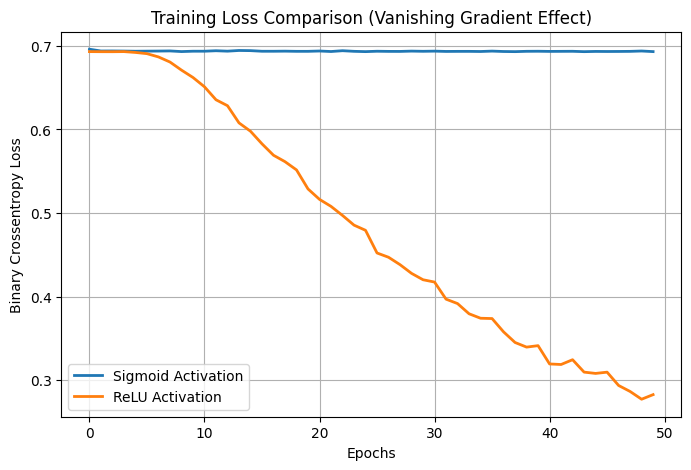

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def Vanishing_gradients(activation, layers=10, epochs=50,
                        X_train=None, y_train=None):

    if X_train is None or y_train is None:
        # Dummy binary data for testing
        X_train = np.random.randn(5000, 20)
        y_train = (np.random.rand(5000) > 0.5).astype(int)

    model = Sequential()
    model.add(Dense(32, activation=activation, input_shape=(20,)))
    for _ in range(layers - 1):
        model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    # store old weights
    old_weights = [w.copy() for w in model.get_weights()]

    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        verbose=0)

    # calculate gradient change from weights
    new_weights = model.get_weights()
    gradient = [old - new for old, new in zip(old_weights, new_weights)]

    return gradient, history.history['loss'], model


# ---- Use the function ----
sigmoid_grad, sigmoid_loss, _ = Vanishing_gradients('sigmoid', layers=10)
relu_grad, relu_loss, _ = Vanishing_gradients('relu', layers=10)

plt.figure(figsize=(8,5))
plt.plot(sigmoid_loss, label='Sigmoid Activation', linewidth=2)
plt.plot(relu_loss, label='ReLU Activation', linewidth=2)
plt.title("Training Loss Comparison (Vanishing Gradient Effect)")
plt.xlabel("Epochs")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()
plt.grid(True)
plt.show()
